In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier


In [8]:
dataset = pd.read_csv('/Users/pavithrasusanmathew/Downloads/diabetes.csv')
print(dataset.head())
print(len(dataset))

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
768


In [13]:
#replace zeroes
zeroes_not_accepted = ['Glucose', 'BloodPressure' , 'SkinThickness' , 'BMI' , 'Insulin']

for column in zeroes_not_accepted:
    dataset[column] = dataset[column].replace(0,np.nan)
    mean = int(dataset[column].mean(skipna = True))
    dataset[column] = dataset[column].replace(np.nan, mean)           


In [14]:
#split dataset
X = dataset.iloc[:,0:8]
y = dataset.iloc[:,8]
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0,test_size = 0.2)

In [15]:
#Feature Scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [17]:
import math
math.sqrt(len(y_test))

12.409673645990857

In [49]:
#Define the model : init knn
classifier = KNeighborsClassifier(n_neighbors = 11, p=2,metric = "euclidean")

In [50]:
classifier.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [51]:
#predict the test set results
y_pred = classifier.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [52]:
#evaluate the model
cm = confusion_matrix(y_test,y_pred)
print(cm)


[[94 13]
 [15 32]]


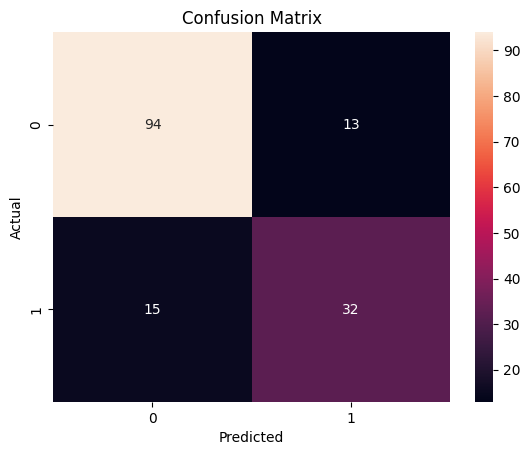

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'cm' is your confusion matrix
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [54]:
#f1 score
print(f1_score(y_test,y_pred))

0.6956521739130435


In [55]:
#accuracy
print(accuracy_score(y_test,y_pred))

0.8181818181818182


In [56]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(614, 8)
(614,)
(154, 8)
(154,)
